# Introduction
The Malaysia government has classified Malaysian into 3 groups based on their monthly household income with T20 refer to the top 20% of the most affluent household group in Malaysia, M40 the middle 40% and B40 the bottom 40%.<br>
Department of Statistics Malaysia has published the median monthly household income of each demarcation. We see that the B40 household has RM 3000 only as median income and hence raises question on whether these households are able to own a house in the Klang Valley.<br>
Moreover, Klang Valley has the most number of M40 household but a RM 5000 household income might also be considered as urban poor as the house price and living expenses in Klang Valley are more expensive.<br>
Therefore, data is scraped from a property listings website in order to address the concerns of house affodability for B40 and M40 groups.<br>
For more information, you may read the article below.<br>
https://www.thestar.com.my/opinion/columnists/on-the-beat/2019/04/07/middle-class-malady

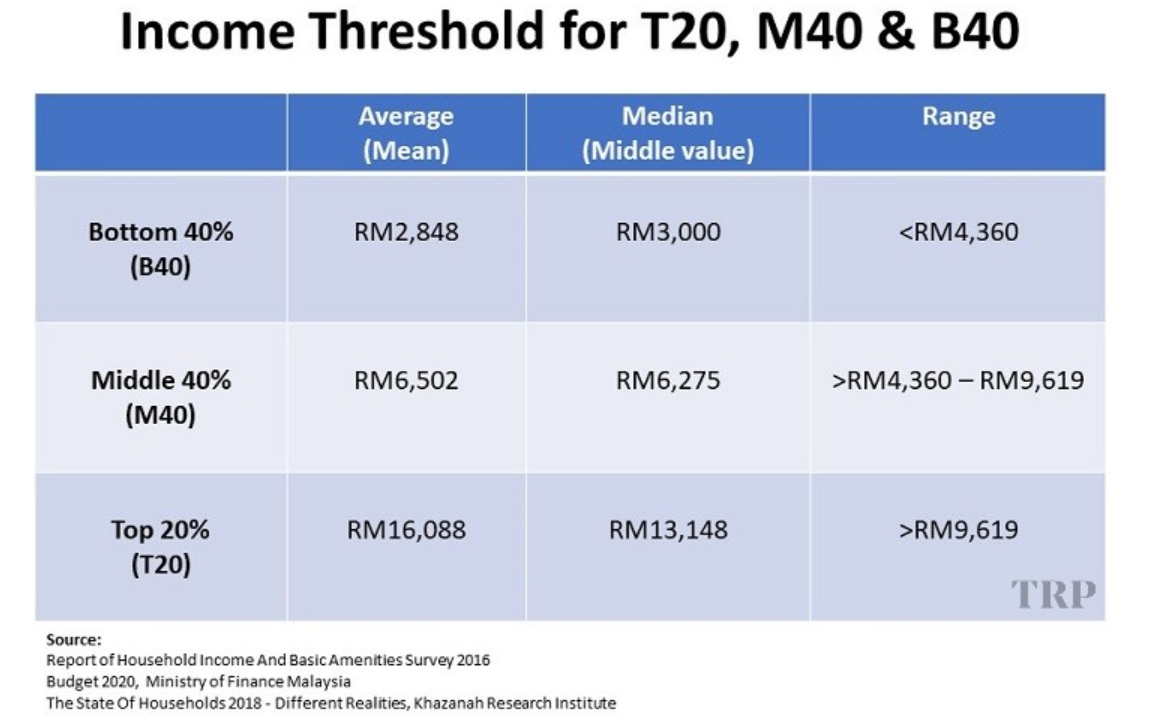

In [1]:
from IPython.display import Image
Image(filename='income.png')

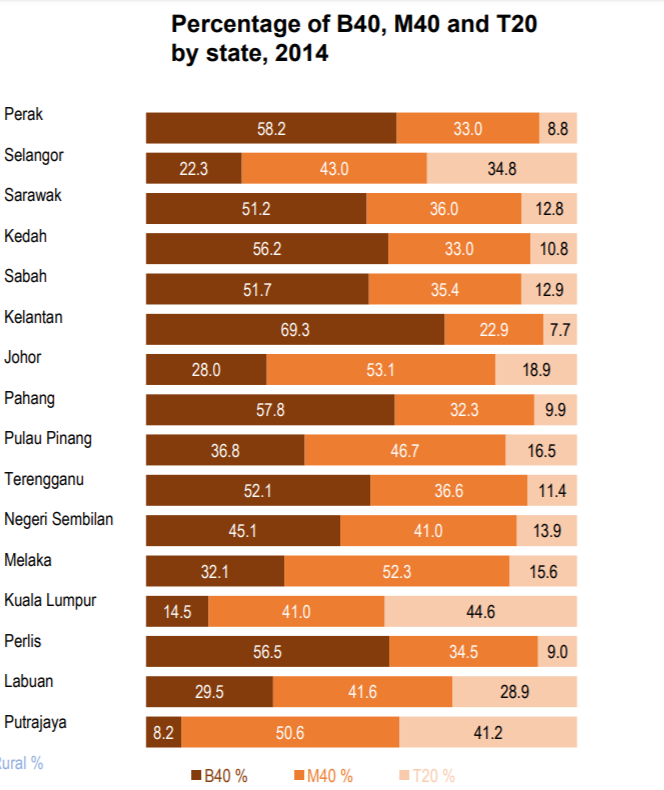

In [2]:
Image(filename='state.png')

The objective of the project is to <br> 
1. Find out whether we have sufficient affordable houses for B40 and M40 groups in Malaysia Klang Valley.<br>
2. Predict house price based on available attributes <br>
3. Recommend possible area and housetype combination to the users with their salary

The steps required are as followed.<br>
1. Data preprocessing to prepare for machine learning<br>
2. Data exploratory to address objective 1 <br>
3. Machine learning with house price as target variable to address objective 2<br>
4. Builing a recommender with net income as input to recommend area and type of house which is affordable for the users.

# 1. Data Preprocessing
The data preprocessing is completed in another notebook. You may find the steps in the github link below.<br>
https://github.com/lpy912/Data-Cleaning

# 2. Data Exploratory

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data=pd.read_csv("cleaned_houseprice.csv")
data.head()

,Area,Price,Bedroom,Bathroom,Type,SquareFeet,Title,Oth_Info,Carpark,Facilities
0,OUG,3999000.0,8.0,8.0,Houses,7000.0,Freehold,Non Bumi Lot,NaN,NaN
1,Desa ParkCity,3300000.0,4.0,3.0,Houses,2379.0,Freehold,Non Bumi Lot,NaN,"Swimming Pool, Gymnasium, Playground, Jogging ..."
2,Wangsa Maju,590000.0,4.0,2.0,Apartments,1065.0,Leasehold,Non Bumi Lot,NaN,"Swimming Pool, Gymnasium, Playground, Jogging ..."
3,Wangsa Maju,590000.0,4.0,2.0,Apartments,1065.0,Leasehold,Non Bumi Lot,NaN,"Swimming Pool, Gymnasium, Playground, Jogging ..."
4,Ampang Hilir,460000.0,2.0,2.0,Apartments,743.0,Leasehold,Non Bumi Lot,NaN,"Swimming Pool, Gymnasium, Tennis Court, Squash..."


In [5]:
data.describe(include="all")

,Area,Price,Bedroom,Bathroom,Type,SquareFeet,Title,Oth_Info,Carpark,Facilities
count,41104,4.110400e+04,38414.000000,38421.000000,38440,3.938300e+04,41103,41103,0.0,25856
unique,159,NaN,NaN,NaN,2,NaN,2,3,NaN,600
top,Cheras,NaN,NaN,NaN,Apartments,NaN,Freehold,Non Bumi Lot,NaN,"Swimming Pool, Gymnasium, Tennis Court, Squash..."
freq,4578,NaN,NaN,NaN,21593,NaN,22309,29497,NaN,4661
mean,NaN,9.390039e+05,3.483287,2.574738,NaN,1.289360e+08,NaN,NaN,NaN,NaN
std,NaN,5.460178e+06,1.049361,1.151924,NaN,2.198212e+10,NaN,NaN,NaN,NaN
min,NaN,1.000000e+00,1.000000,1.000000,NaN,0.000000e+00,NaN,NaN,NaN,NaN
25%,NaN,3.000000e+05,3.000000,2.000000,NaN,8.800000e+02,NaN,NaN,NaN,NaN
50%,NaN,4.400000e+05,3.000000,2.000000,NaN,1.200000e+03,NaN,NaN,NaN,NaN
75%,NaN,6.800000e+05,4.000000,3.000000,NaN,1.800000e+03,NaN,NaN,NaN,NaN


Some possible error in data input:<br>
1.If there is no house type indicated, it is a land for sales instead of a property. Hence, remove from the dataset as we are interested in house price only.<br>
2.House Price has an min value of 1.0 which does not make sense.It is impossible to have house price of less than 100k in Klang Valley based on a simple web search in Mudah.com. Hence, any house price less than that will be removed so that it gives an accurate result in machine learning later.<br>
3.It is impossible for the square feet of a house to reach 4.4x10^12 in Klang Valley as well. A football field is only 57600 sq ft to begin with.<br> 
4.Having 10 bedroom and 10 bathroom is also a suspicious data input error but it might also be an outlier.<br>
**All of the point 3-4 are solved with the removal of non-housing property observations.

In [6]:
#Remove rows with Type=NA/blank
land=(data['Type']=='Houses') | (data['Type']=='Apartments')
data=data[land==True]

In [7]:
#Remove house price<100000
price=data['Price']>100000
data=data[price==True]

In [8]:
data.describe(include='all')

,Area,Price,Bedroom,Bathroom,Type,SquareFeet,Title,Oth_Info,Carpark,Facilities
count,38221,3.822100e+04,38197.000000,38204.000000,38221,3.822100e+04,38221,38221,0.0,25379
unique,157,NaN,NaN,NaN,2,NaN,2,3,NaN,594
top,Cheras,NaN,NaN,NaN,Apartments,NaN,Freehold,Non Bumi Lot,NaN,"Swimming Pool, Gymnasium, Tennis Court, Squash..."
freq,4328,NaN,NaN,NaN,21381,NaN,20712,27287,NaN,4633
mean,NaN,6.175186e+05,3.487080,2.580227,NaN,1.823763e+03,NaN,NaN,NaN,NaN
std,NaN,1.229345e+06,1.050471,1.151997,NaN,1.133275e+04,NaN,NaN,NaN,NaN
min,NaN,1.030000e+05,1.000000,1.000000,NaN,0.000000e+00,NaN,NaN,NaN,NaN
25%,NaN,3.000000e+05,3.000000,2.000000,NaN,8.780000e+02,NaN,NaN,NaN,NaN
50%,NaN,4.300000e+05,3.000000,2.000000,NaN,1.200000e+03,NaN,NaN,NaN,NaN
75%,NaN,6.400000e+05,4.000000,3.000000,NaN,1.750000e+03,NaN,NaN,NaN,NaN


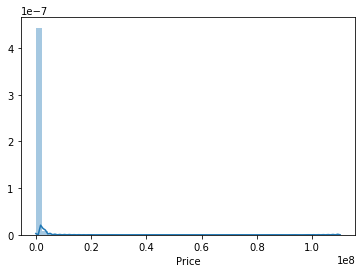

In [9]:
sns.distplot(data['Price'])

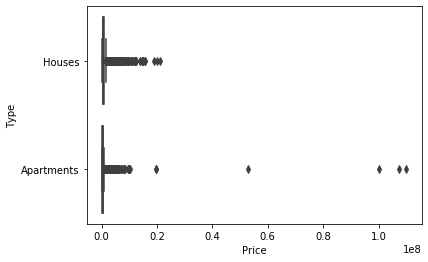

In [10]:
sns.boxplot(x='Price',y='Type',data=data)

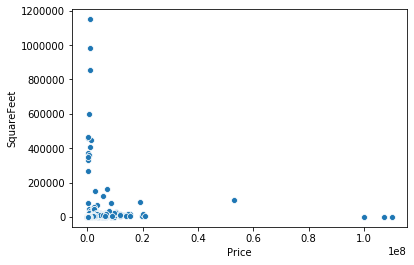

In [11]:
sns.scatterplot(data['Price'],data['SquareFeet'])

We can see that although invalid data is removed, we still have outliers. Outliers is temporary removed so that we can visualize the observations better. Outlier should be kept in machine learning unless it violate the assupmtions of the chosen models.

In [12]:
#Remove outlier using IQR calculation from the Price column and reconstruct the boxplot and distribution plot.
Q1_P = data.Price.quantile(0.25)
Q3_P = data.Price.quantile(0.75)
IQR_P = Q3_P - Q1_P
Outlier_P=(data['Price'] < (Q1_P - 1.5 * IQR_P)) |(data['Price'] > (Q3_P + 1.5 * IQR_P))
data2=data[Outlier_P==False]

In [13]:
#Remove outlier using IQR calculation from the Square Feet column and reconstruct the boxplot and distribution plot.
Q1 = data.SquareFeet.quantile(0.25)
Q3 = data.SquareFeet.quantile(0.75)
IQR = Q3 - Q1
Outlier=(data['SquareFeet'] < (Q1 - 1.5 * IQR)) |(data['SquareFeet'] > (Q3 + 1.5 * IQR))
data2=data2[Outlier==False]

C:\Users\loel7003\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


## Recreate distplot, boxplot and scatterplot after removing outlier

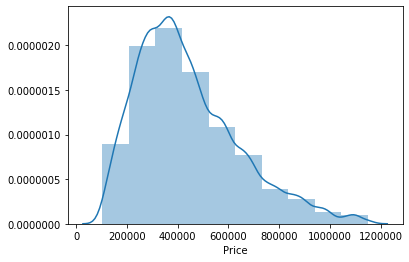

In [14]:
sns.distplot(data2['Price'],bins=10)

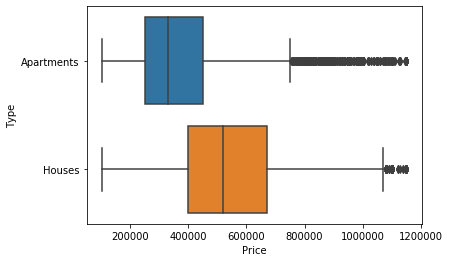

In [15]:
sns.boxplot(x='Price',y='Type',data=data2)

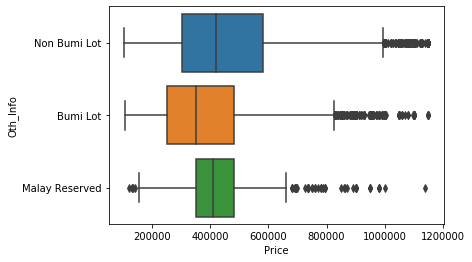

In [16]:
sns.boxplot(x='Price',y='Oth_Info',data=data2)

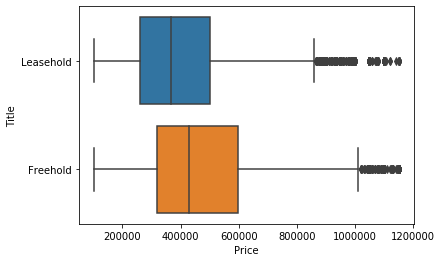

In [17]:
sns.boxplot(x='Price',y='Title',data=data2)

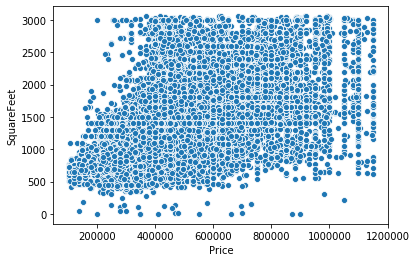

In [18]:
sns.scatterplot(data2['Price'],data2['SquareFeet'])

In [19]:
data['Area'].value_counts()

Cheras           4328
Shah Alam        1906
Setapak          1810
Kajang           1550
Klang            1435
                 ... 
TPM                 1
Taman Duta          1
Bukit Ledang        1
Valencia            1
Tanjong Sepat       1
Name: Area, Length: 157, dtype: int64

In [20]:
data['Type'].value_counts(normalize=True)

Apartments    0.559405
Houses        0.440595
Name: Type, dtype: float64

In [21]:
data['Title'].value_counts(normalize=True)

Freehold     0.541901
Leasehold    0.458099
Name: Title, dtype: float64

In [22]:
data['Price'].groupby(data['Area']).median().nlargest(10)

Area
Bukit Persekutuan            10000000.0
Country Heights Damansara     8180000.0
Kenny Hills                   5900000.0
Country Heights               4888000.0
Damansara Heights             4100000.0
SS2                           3075000.0
SierraMas                     2850000.0
Subang Heights                2640000.0
Setia Eco Park                2550000.0
USJ Heights                   2520000.0
Name: Price, dtype: float64

In [23]:
data['Price'].groupby(data['Area']).median().nsmallest(10)

Area
Tanjong Sepat        130000.0
Batang Berjuntai     187500.0
Kerling              193000.0
Jinjang              230000.0
Kuala Kubu Baru      244000.0
Damansara Damai      249990.0
Subang Bestari       258000.0
Damansara Perdana    260000.0
Bukit Beruntung      270000.0
Desa Petaling        270000.0
Name: Price, dtype: float64

## Initial Findings
The house price in Klang Valley is right skewed.<br>
Houses are more expensive than apartments while freehold is more expensive than leasehold.<br>
However, there are also apartments which costs as much as the landed houses in Klang Valley.<br>
Non Bumi lot is more expensive than Bumi Lot and Malay Reserved Land.<br>
Generally, house price is directly proportional to the area/size of the property but we can observe from the scatterplot that at a given house price, there are huge range of area to choose from. Hence, house price is not just depending on area/size in sq ft.<br>
The top 5 areas with the most properties listing in our dataset are <br>
1.Cheras<br>2.Shah Alam <br>3.Setapak<br>4.Kajang <br>5.Klang<br><br>
The top 5 most expensive area to buy a house are<br>
1.Bukit Persekutuan<br>2.Country Heights Damansara<br>3.Kenny Hills<br>4.Country Heights<br>5.Damansara Heights<br><br>
The most affordable top 5 areas to buy a house are<br>
1.Tanjong Sepat<br>2.Batang Berjuntai<br>3.Kerling<br>4.Jinjang<br>5.Kuala Kubu Baru<br><br>
The median of house price in Klang Valley is 430k.<br>
There are slightly more apartments than houses in the dataset. <br>
Freehold also has slightly more listings than leasehold.<br>
Overall, the data is not skewed to any of the house type and can be used in machine learning without the need to balance the observations (SMOTE) of any categories. 

## Do we have sufficient affordable houses for B40 and M40 group in Malaysia Klang Valley?


Assume that<br>
1. the RM4360 is the maximum Nett Income of the B40 household in Klang Valley, RM 6275 is the median nett monthly income of M40's<br>
2. the bank is willing to loan up to 90% of the house price and <br>
3. the buyers already have 10% of the house price as downpayment and extra cash for any stampy duty, legal fees and etc.<br>
4. the interest rate is fixed at 4.5% per annum
5. the tenure is 30 years.<br> 
6. monthly installments does not exceed 30% of your total income<br>

The calculation is based on the article and formula below.
https://www.comparehero.my/property/articles/how-much-earn-own-house-kl

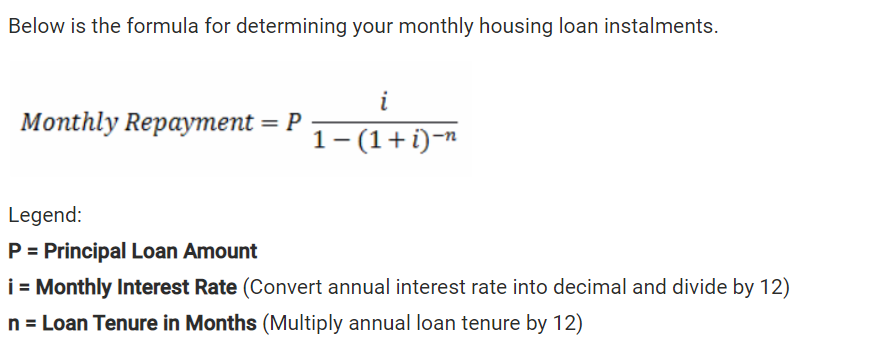

In [24]:
Image(filename='monthly.png')

In [25]:
#Calculate the minimum income required to buy the house assume that 30% of the income is used for monthly installment based on the above mentioned assumptions
data['MinIncome']=((0.9*data['Price']*(0.045/12))/(1-(1+(0.045/12))**(-30*12)))/0.3

In [26]:
#B40
sum(data['MinIncome']<4360)/len(data['Price'])

0.21276261740927763

In [27]:
#M40 (using median income)
sum(data['MinIncome']<6275)/len(data['Price'])

0.4675178566756495

### With the above assumptions, there are merely 21% of houses which is affordable for the B40 group and 47% for M40 in Klang Valley. In conclusion, less than 50% of the houses in Klang Valley is catered for B40 and M40 groups.

## Data Formatting for Machine Learning
All categorical data needs to be changed into 0,1 to fit into the linear regression model. NaN is not allowed. Hence, a value have to be imputed or the row can be removed.

In [28]:
#Format categorical data for Title and Type into binary
print(data2['Title'].unique())
data2['Title']=data2['Title'].astype('str').replace({"Freehold":1,"Leasehold":0})

['Leasehold' 'Freehold']


In [29]:
print(data2['Type'].unique())
data2['Type']=data2['Type'].astype('str').replace({"Houses":1,"Apartments":0})

['Apartments' 'Houses']


In [30]:
print(data2['Oth_Info'].unique())
data2['Oth_Info']=data2['Oth_Info'].astype('str').replace({"Non Bumi Lot":1,"Bumi Lot":0,"Malay Reserved":0})

['Non Bumi Lot' 'Bumi Lot' 'Malay Reserved']


The article explains the difference between Bumi Lot and Malay Reserved. Since both has certain restrictions in the purchasing process, they are grouped as one so that Oth_Info can become binary.<br>
https://www.propertyhunter.com.my/news/2019/07/6838/article/what-you-need-to-know-about-malay-reserve-land-and-bumiputera-land-part-1

In [31]:
#Impute NaN with median for Bedroom, Bathroom, SquareFeet
data2['Bedroom']=data2['Bedroom'].fillna(data['Bedroom'].median())
data2['Bathroom']=data2['Bathroom'].fillna(data['Bathroom'].median())
data2['SquareFeet']=data2['SquareFeet'].fillna(data['SquareFeet'].median())

## Machine learning
Linear regression, Random Forest regressor, Gradient Boosting Regressor and Decision Tree regressor are used in the supervised machine learning. <br>
Their Mean Squared Error and R-squared are compared to find out the best regressor to be used in the next milestone.<br>
The lower the MSE, the better. The higher the R-squared the better is the model.<br>
We are also interested on the main attributes which affect house price within the best model.<br>
Reference<br>Scikit-learn: Machine Learning in Python, Pedregosa et al., JMLR 12, pp. 2825-2830, 2011.

In [32]:
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.ensemble import VotingRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [33]:
data2.columns

Index(['Area', 'Price', 'Bedroom', 'Bathroom', 'Type', 'SquareFeet', 'Title',
       'Oth_Info', 'Carpark', 'Facilities'],
      dtype='object')

In [34]:
y=data2['Price']
X=data2.loc[:,['SquareFeet','Bedroom','Bathroom','Title','Type','Oth_Info']]

In [35]:
kf = KFold(n_splits=10, random_state=None, shuffle=True)
reg1 =DecisionTreeRegressor()
reg2 = GradientBoostingRegressor(random_state=1)
reg3 = RandomForestRegressor(random_state=1)
reg4= LinearRegression()
scores_1 = cross_val_score(reg1, X, y, cv=kf,scoring='neg_mean_squared_error')
scores_2 = cross_val_score(reg2, X, y, cv=kf,scoring='neg_mean_squared_error')
scores_3 = cross_val_score(reg3, X, y, cv=kf,scoring='neg_mean_squared_error')
scores_4 = cross_val_score(reg4, X, y, cv=kf,scoring='neg_mean_squared_error')
avg_score_1 = np.mean(scores_1*(-1))
avg_score_2 = np.mean(scores_2*(-1))
avg_score_3 = np.mean(scores_3*(-1))
avg_score_4 = np.mean(scores_4*(-1))
r_1 = cross_val_score(reg1, X, y, cv=kf,scoring='r2')
r_2 = cross_val_score(reg2, X, y, cv=kf,scoring='r2')
r_3 = cross_val_score(reg3, X, y, cv=kf,scoring='r2')
r_4 = cross_val_score(reg4, X, y, cv=kf,scoring='r2')
avg_r_1 = np.mean(r_1)
avg_r_2 = np.mean(r_2)
avg_r_3 = np.mean(r_3)
avg_r_4 = np.mean(r_4)
print("The mean squared error (MSE) using Decision Tree Regressor: {:.2f}".format(avg_score_1))
print("The mean squared error (MSE) using Gradient Boosting Regressor: {:.2f}".format(avg_score_2))
print("The mean squared error (MSE) using Random Forest Regressor: {:.2f}".format(avg_score_3))
print("The mean squared error (MSE) using Linear Regression: {:.2f}".format(avg_score_4))
print("The R-squared using Decision Tree Regressor: {:.2f}".format(avg_r_1))
print("The R-squared using Gradient Boosting Regressor: {:.2f}".format(avg_r_2))
print("The R-squared using Random Forest Regressor: {:.2f}".format(avg_r_3))
print("The R-squared using Linear Regression: {:.2f}".format(avg_r_4))

The mean squared error (MSE) using Decision Tree Regressor: 15711112738.00
The mean squared error (MSE) using Gradient Boosting Regressor: 16483274345.13
The mean squared error (MSE) using Random Forest Regressor: 13788859614.12
The mean squared error (MSE) using Linear Regression: 22293971808.31
The R-squared using Decision Tree Regressor: 0.62
The R-squared using Gradient Boosting Regressor: 0.60
The R-squared using Random Forest Regressor: 0.67
The R-squared using Linear Regression: 0.46


In [36]:
#Most important attributes
#Ref:https://machinelearningmastery.com/calculate-feature-importance-with-python/
#sequence of the feature follows the sequence in X
reg3.fit(X, y)
importance = reg3.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.80194
Feature: 1, Score: 0.07603
Feature: 2, Score: 0.04344
Feature: 3, Score: 0.03034
Feature: 4, Score: 0.02748
Feature: 5, Score: 0.02078


From the R-squared and Mean Squared Error, Random Forest has the best performance in predicting the house price using on SquareFeet, Bedroom, Bathroom, Title, Type and Oth_Info but only SquareFeet is the most important attribute in predicting house price with a score of 0.80.<br> 
67% of the variance in the dataset can be explained using the model. <br>
Linear regression perform the worse as expected as <br>
(i) there is no clear linear relationship between house price and squarefeet and <br>
(ii) the normality assumption is also violated even though the outliers are removed, <br>
(iii) the data is rightly skewed instead of normally distributed. <br>
Hence, Random Forest will be used in the applications for house price prediction.

# Build Recommender
With the input of nett monthly salary,ideal house type, title, bathroom and bedroom input, the recommender aims to compare it with the house price to derive affordability. Then, it will list top 3 area that is will most probably have houses/apartments within the affordable range. <br>
Similarity of the users input and the dataset is computed to recommend the top 3 areas with highest score of similarity.<br>
This will give users clue on which area has affordable houses for them in the Klang Valley or unfortunately, none of the house is affordable for them in the Klang Valley based on their ideal house type, title, number of bathroom and number of bedroom.

In [43]:
print("Enter your monthly salary")
salary=input()

Enter your monthly salary
4500


In [44]:
print("Enter your ideal years of tenure")
tenure=input()

Enter your ideal years of tenure
30


In [45]:
print("Enter bank interest rate in %, for eg. 4.25")
i=input()

Enter bank interest rate in %, for eg. 4.25
4.5


In [46]:
#select house type,title and bathroom and bedroom
print("Enter your ideal bathroom number")
bathroom=input()

Enter your ideal bathroom number
2


In [47]:
print("Enter your ideal bedroom number")
bedroom=input()

Enter your ideal bedroom number
3


In [48]:
print("Enter your ideal house type. Type 1 for Houses and 0 for Apartments ")
typehse=input()

Enter your ideal house type. Type 1 for Houses and 0 for Apartments 
0


In [49]:
print("Enter ideal entitlement of the house. Type 1 for Freehold and 0 for Leasehold")
title=input()

Enter ideal entitlement of the house. Type 1 for Freehold and 0 for Leasehold
1


In [50]:
#convert type of inputs
salary=int(salary)
bedroom=int(bedroom)
bathroom=int(bathroom)
i=float(i)/100
tenure=int(tenure)

In [51]:
#receive input of nett monthly salary, reverse the above formula to check affordability
a=(1-(1+(i/12))**(-tenure*12))

In [52]:
affordhseprice=(a*0.3*salary)/(0.9*(i/12))

In [53]:
affordhseprice

296041.7385132896

In [54]:
#within affordable houses (plus 3% of the affordable house price),
data2['Afford']=data2['Price']<=affordhseprice*1.03

In [55]:
data2.head()

,Area,Price,Bedroom,Bathroom,Type,SquareFeet,Title,Oth_Info,Carpark,Facilities,Afford
2,Wangsa Maju,590000.0,4.0,2.0,0,1065.0,0,1,NaN,"Swimming Pool, Gymnasium, Playground, Jogging ...",False
3,Wangsa Maju,590000.0,4.0,2.0,0,1065.0,0,1,NaN,"Swimming Pool, Gymnasium, Playground, Jogging ...",False
4,Ampang Hilir,460000.0,2.0,2.0,0,743.0,0,1,NaN,"Swimming Pool, Gymnasium, Tennis Court, Squash...",False
5,Cheras,300000.0,3.0,2.0,0,748.0,0,0,NaN,"Mini Market, Playground, Jogging Track, 24 Hou...",True
6,Cheras,950000.0,7.0,5.0,1,2400.0,0,1,NaN,"Mini Market, Playground, 24 Hour Security, Bal...",False


In [56]:
data3=data2[data2['Afford']==True]
data3.head()

,Area,Price,Bedroom,Bathroom,Type,SquareFeet,Title,Oth_Info,Carpark,Facilities,Afford
5,Cheras,300000.0,3.0,2.0,0,748.0,0,0,NaN,"Mini Market, Playground, Jogging Track, 24 Hou...",True
7,Bandar Tasik Selatan,199000.0,3.0,2.0,0,650.0,0,0,NaN,NaN,True
15,Cheras,230000.0,3.0,2.0,0,1000.0,0,1,NaN,NaN,True
22,Wangsa Maju,185000.0,2.0,1.0,0,600.0,1,0,NaN,NaN,True
23,Desa Petaling,260000.0,3.0,2.0,0,826.0,0,1,NaN,NaN,True


In [57]:
#within this data3, find the most similar combination of ideal house for the users and the nearest house price based on affordable price.
#find abs difference between house price and affordable house price
data3['Diff']=abs(data3['Price']-affordhseprice)

C:\Users\loel7003\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [58]:
data3['Bedroom']=data3.Bedroom.astype(float).astype(int)
data3['Bathroom']=data3.Bedroom.astype(float).astype(int)

C:\Users\loel7003\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\loel7003\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [59]:
#concatenate the title,bedroom, bathroom and type 
data3['Bedroom']=data3['Bedroom'].astype(str)
data3['Bathroom']=data3['Bathroom'].astype(str)
data3['Title']=data3['Title'].astype(str)
data3['Type']=data3['Type'].astype(str)

C:\Users\loel7003\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\loel7003\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\loel7003\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on 

In [60]:
data3['Key']=data3['Title']+data3['Bedroom']+data3['Bathroom']+data3['Type']
data3.Key.head()

C:\Users\loel7003\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


5     0330
7     0330
15    0330
22    1220
23    0330
Name: Key, dtype: object

In [67]:
data3.reset_index()

,index,Area,Price,Bedroom,Bathroom,Type,SquareFeet,Title,Oth_Info,Carpark,Facilities,Afford,Diff,Key
0,5,Cheras,300000.0,3,3,0,748.0,0,0,NaN,"Mini Market, Playground, Jogging Track, 24 Hou...",True,3958.261487,0330
1,7,Bandar Tasik Selatan,199000.0,3,3,0,650.0,0,0,NaN,NaN,True,97041.738513,0330
2,15,Cheras,230000.0,3,3,0,1000.0,0,1,NaN,NaN,True,66041.738513,0330
3,22,Wangsa Maju,185000.0,2,2,0,600.0,1,0,NaN,NaN,True,111041.738513,1220
4,23,Desa Petaling,260000.0,3,3,0,826.0,0,1,NaN,NaN,True,36041.738513,0330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9742,41092,Cheras,220000.0,3,3,0,820.0,1,0,NaN,"Mini Market, Playground, Cable TV",True,76041.738513,1330
9743,41093,Seri Kembangan,180000.0,3,3,0,720.0,1,0,NaN,NaN,True,116041.738513,1330
9744,41094,Subang Bestari,220000.0,3,3,0,877.0,0,0,NaN,"Playground, 24 Hour Security, Balcony/Patio",True,76041.738513,0330
9745,41102,Seri Kembangan,260000.0,3,3,0,895.0,0,1,NaN,"Swimming Pool, Mini Market, Playground, Joggin...",True,36041.738513,0330


In [69]:
Keyone=str(title)+str(bedroom)+str(bathroom)+str(typehse)

In [70]:
Keyone

'1320'

In [75]:
data3['Keyone']=Keyone

C:\Users\loel7003\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [76]:
data3.head()

,Area,Price,Bedroom,Bathroom,Type,SquareFeet,Title,Oth_Info,Carpark,Facilities,Afford,Diff,Key,Keyone
5,Cheras,300000.0,3,3,0,748.0,0,0,NaN,"Mini Market, Playground, Jogging Track, 24 Hou...",True,3958.261487,0330,1320
7,Bandar Tasik Selatan,199000.0,3,3,0,650.0,0,0,NaN,NaN,True,97041.738513,0330,1320
15,Cheras,230000.0,3,3,0,1000.0,0,1,NaN,NaN,True,66041.738513,0330,1320
22,Wangsa Maju,185000.0,2,2,0,600.0,1,0,NaN,NaN,True,111041.738513,1220,1320
23,Desa Petaling,260000.0,3,3,0,826.0,0,1,NaN,NaN,True,36041.738513,0330,1320


In [77]:
#compare combination of title, bedroom, bathroom and type by users with what we have in the dataset using similarity score
from difflib import SequenceMatcher
def sim_metric(df, col1, col2):
    return SequenceMatcher(None, df[col1], df[col2]).ratio()

data3['Similarity']=data3.apply(sim_metric,args=('Keyone', 'Key'),axis=1)

C:\Users\loel7003\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [78]:
#list all area within the range of affordability and with highest similarity in ideal house combination.
#sort then print top 3 area
data3 = data3.sort_values(["Similarity", "Diff"], ascending = (False, True))
data3['Area'].head(3)

26640         Bandar Botanic
38328    Bandar Bukit Tinggi
1234                 Setapak
Name: Area, dtype: object